**Testando webscapping com dados de investimentos**

A ideia é pegar os dados da seguinte tabela dos sites meus dividendos, pegando as empresas e seu valor de mercado

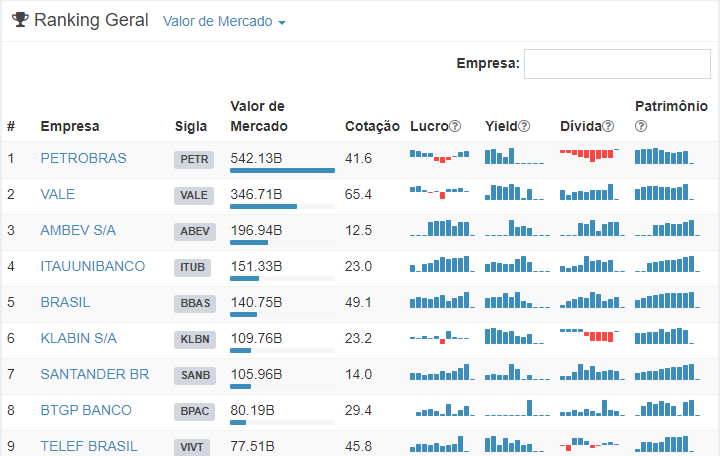

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# URL da página web que você deseja fazer o scraping
url = "https://www.meusdividendos.com/empresas/ranking?q=valorMercado"

# Fazendo a requisição para a URL
response = requests.get(url)

# Criando o objeto BeautifulSoup pegando o resquest com a variavel response e identificando com html.parser
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrando a tabela no HTML
table = soup.find('table')

# Lendo a tabela com o pandas transformando a tabela em uma string e acessando a primeira tebela encontrada
df = pd.read_html(str(table))[0]


# Selecionando apenas as colunas desejadas
df = df[['Empresa', 'Sigla', 'Valor de Mercado']]
print(df)

# Salvando o DataFrame em um arquivo Excel
df.to_excel("ranking_empresas_bovespa.xlsx", index=False)

              Empresa Sigla  Valor de Mercado
0       PETROBRASPETR  PETR      5.421293e+11
1            VALEVALE  VALE      3.467142e+11
2       AMBEV S/AABEV  ABEV      1.969417e+11
3    ITAUUNIBANCOITUB  ITUB      1.513273e+11
4          BRASILBBAS  BBAS      1.407493e+11
..                ...   ...               ...
347     VIAVAREJOVIIA  VIIA      0.000000e+00
348    BIOTOSCANAGBIO  GBIO      0.000000e+00
349     COSAN LTDCZLT  CZLT      0.000000e+00
350          PPLAPPLA  PPLA      0.000000e+00
351   WILSON SONSWSON  WSON      0.000000e+00

[352 rows x 3 columns]


Funcionou direitinho!

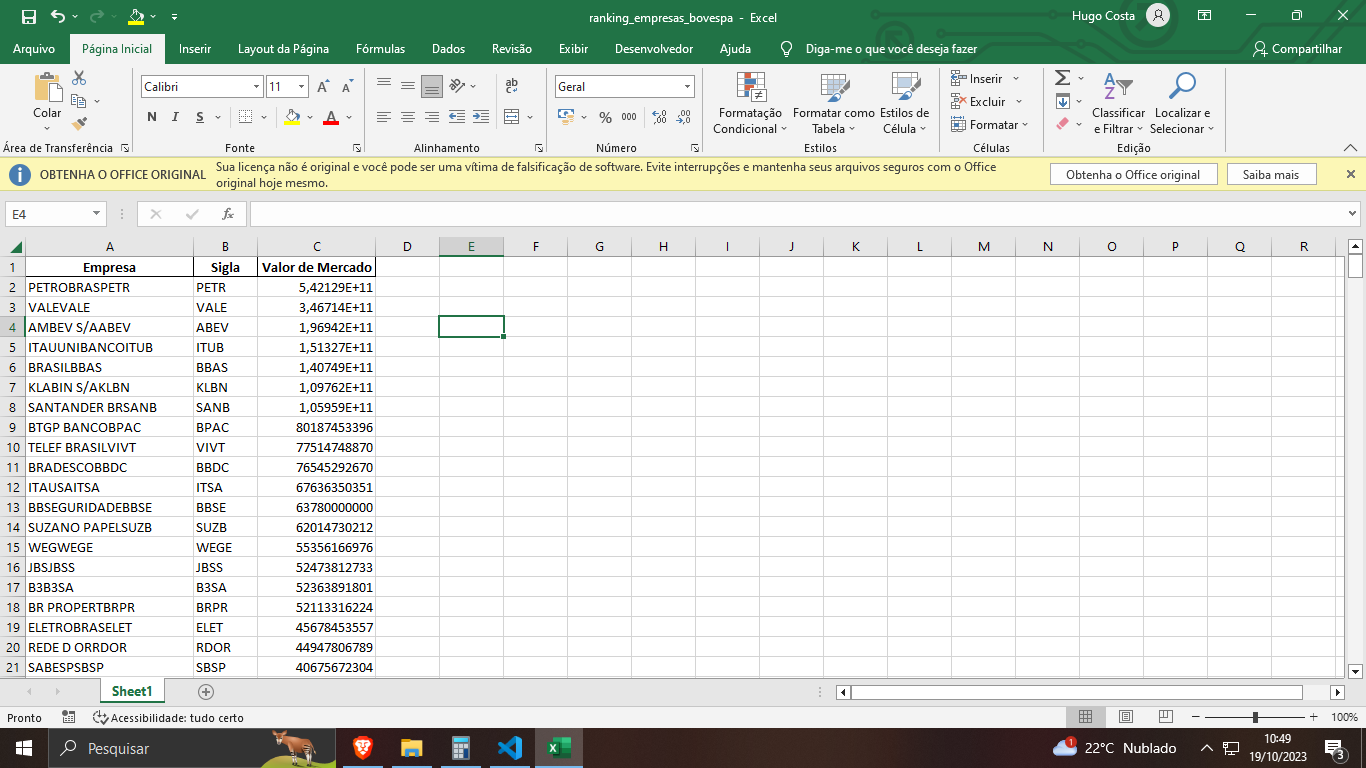

**Questão 2: Conseguir pegar os dados da tabela abaixo**

Resolução: Como ela não é a primeira tabela para se identificar, podemos inspecionar o html e encontrar uma id ou classe que nos permita selecionar seus dados. Utilizando o metodo find:

**table = soup.find('table', id='tabela_desejada')**



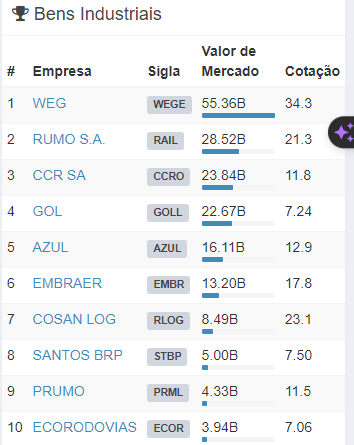

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Definindo uma função para realizar o webscrapping
def scrape_table(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')
        return None
    except Exception as err:
        print(f'Other error occurred: {err}')
        return None

    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', class_='table table-striped table-condensed table-hover')

    if table is None:
        print('No table found on the webpage.')
        return None

    return table

# Pegando a tabela e transformando em um dataframe
def parse_table_to_df(table):
    df = pd.read_html(str(table))[0]
    print(df)
    # Add any data cleaning steps here
    return df

def save_df_to_excel(df, filename):
    df.to_excel(filename, index=False)

url = "https://www.meusdividendos.com/empresas/ranking/Bens%20Industriais"
table = scrape_table(url)


df = parse_table_to_df(table)
save_df_to_excel(df, "ranking_bens.xlsx")


     #                   Empresa Sigla  Lucro Líquido  Cotação  Lucro  Yield  \
0    1             ALL NORTEFRRN  FRRN      752021000      NaN    NaN    NaN   
1    2            MRS LOGISTMRSA  MRSA      521616000     5.51    NaN    NaN   
2    3                   JSLJSLG  JSLG      318625000     9.01    NaN    NaN   
3    4             RUMO S.A.RAIL  RAIL      272967000    22.20    NaN    NaN   
4    5                  TUPYTUPY  TUPY      271721000    25.10    NaN    NaN   
5    6           RANDON PARTRAPT  RAPT      226903000     9.36    NaN    NaN   
6    7             MARCOPOLOPOMO  POMO      190947000     4.06    NaN    NaN   
7    8             INDS ROMIROMI  ROMI      174699000    11.70    NaN    NaN   
8    9            PORTOBELLOPTBL  PTBL      134312000     5.02    NaN    NaN   
9   10           WILSON SONSWSON  WSON      121414000    67.00    NaN    NaN   
10  11                 TEGMATGMA  TGMA      108249000    24.30    NaN    NaN   
11  12                 VALIDVLID  VLID  